Tune the pygco package


In [ ]:
import subprocess


def get_package_path(package_name):
    # Run the pip show command and capture the output
    result = subprocess.run(
        ['pip', 'show', package_name],
        stdout=subprocess.PIPE,
        text=True
    )

    # Split the output into lines and find the line starting with "Location"
    for line in result.stdout.splitlines():
        if line.startswith('Location:'):
            # Extract and return the path, trimming any whitespace
            return line.split(':', 1)[1].strip()


# Example usage
package_name = 'gco-wrapper'
path = get_package_path(package_name)
print(f"The installation path for {package_name} is: {path}")

gco_pygco_path = path + '/gco/pygco.py'
# Read the content of the file
with open(gco_pygco_path, 'r') as file:
    content = file.read()

# Replace the target line
content = content.replace(
    '_float_types = [np.float, np.float32, np.float64, np.float128]',
    '_float_types = [np.float, np.float32, np.float64]'
)

# Write the modified content back to the file
with open(gco_pygco_path, 'w') as file:
    file.write(content)

print(f"Modified the file at {gco_pygco_path}")

The installation path for gco-wrapper is: /Users/yinnnyou/anaconda3/envs/mlflow/lib/python3.11/site-packages
Modified the file at /Users/yinnnyou/anaconda3/envs/mlflow/lib/python3.11/site-packages/gco/pygco.py


### Demo

Please install the requirements.txt


In [ ]:
from hyper_kvasir.dataset import HyperKvasirDataModule
import torchvision.transforms as T

# init the dataset and the dataloader
dm = HyperKvasirDataModule(
    # provide dataset config
    img_size=128,
    batch_size=32,
    transform=[
        # T.RandomRotation(45),
    ],

    # To set up cutmix
    # mixed_aug_with_target=[
    #     "backend_central_dev.data_processing.mix.CutMixUp",
    #     dict(
    #         prob=1.0,
    #         use_mixup=False,
    #     )
    # ]

    # To set up puzzlemix
    mixed_aug_with_target_and_model=[
        "backend_central_dev.data_processing.mix.PuzzleMix",
        dict(
            prob=1.0,
        )
    ]
)

/Users/yinnnyou/anaconda3/envs/mlflow/lib/python3.11/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


Applied transform for training: 
Compose(
      Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
      Lambda()
)
Applied mixed_aug_with_target_and_model for training: 
PuzzleMix(num_classes=20, config={'prob': 1.0}, saliency_model=None)
Applied transform for validating: 
Compose(
      Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
      Lambda()
)


In [3]:
from effnetv2s.model import model_init_func, model_fine_tune_func
from backend_central_dev.model_training.lightning_model import FineTunableModel, MlxOps_LightningModel

ftm = FineTunableModel(
    model_init_func=model_init_func,
    model_fine_tune_func=model_fine_tune_func,
)

model = MlxOps_LightningModel(
    ftm, dm.num_classes,
    debug=True
)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Dataset exist:  /Users/yinnnyou/autodl-tmp/ml_data/hyper_kvasir/labeled-images
Saliency Dataset exist:  None



  | Name    | Type             | Params
---------------------------------------------
0 | model   | EfficientNet     | 20.2 M
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
20.2 M    Trainable params
0         Non-trainable params
20.2 M    Total params
80.812    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

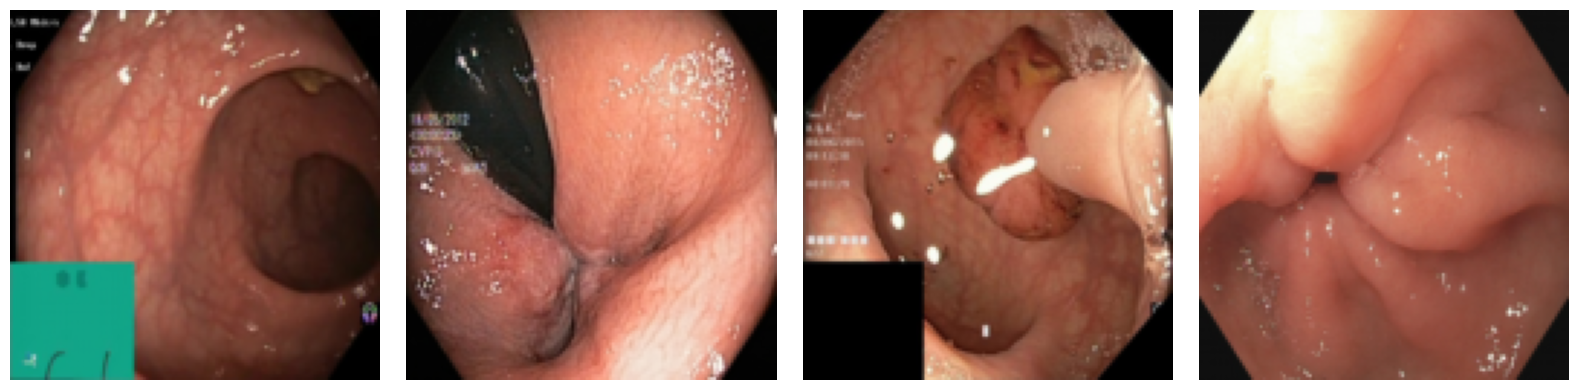

tensor([ 3, 12, 10, 11], device='mps:0')


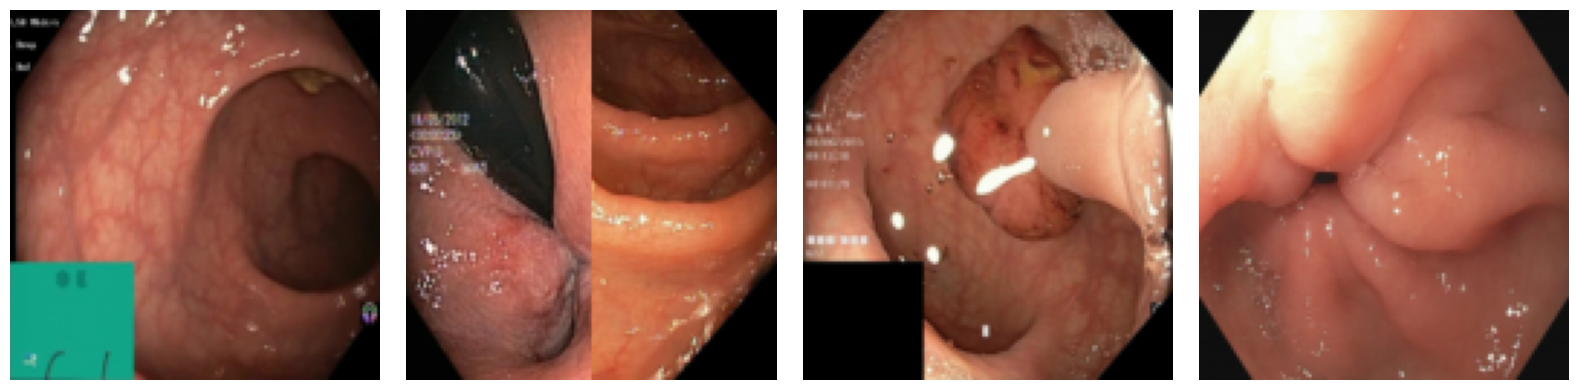

tensor([[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.5000, 0.0000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000]], device='mps:0')


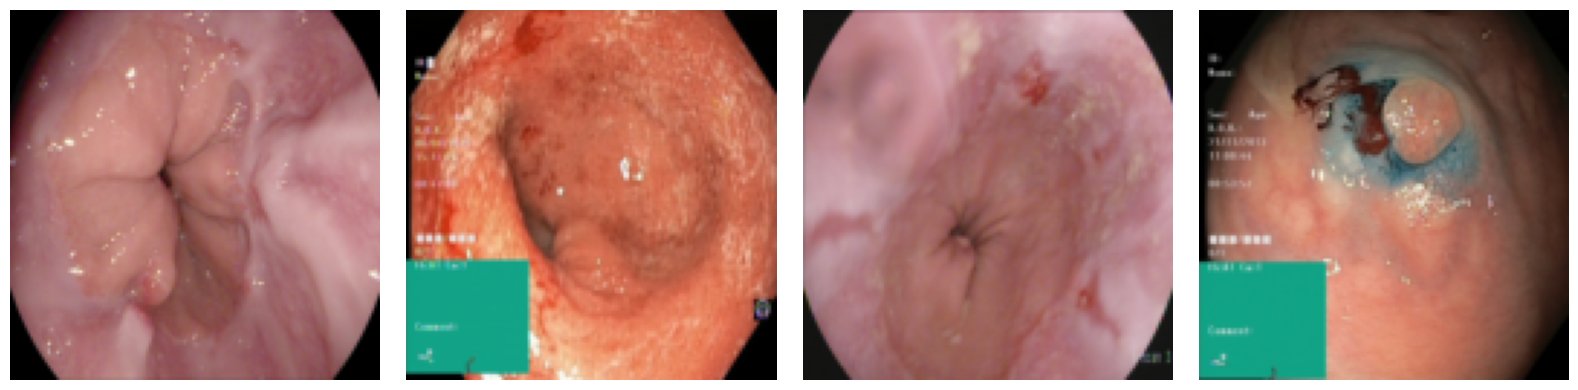

tensor([ 7, 16,  7,  5], device='mps:0')


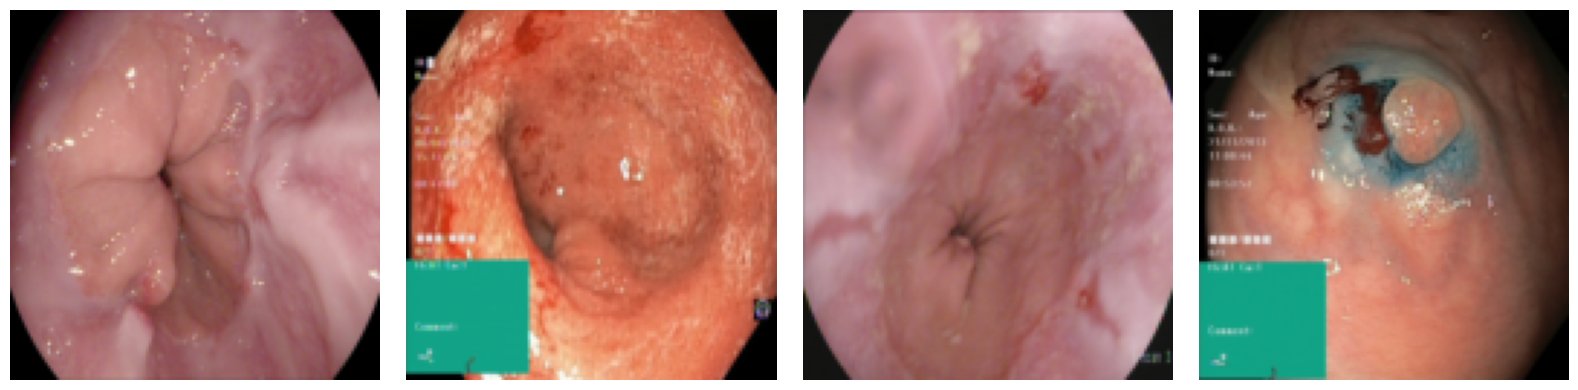

tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]], device='mps:0')


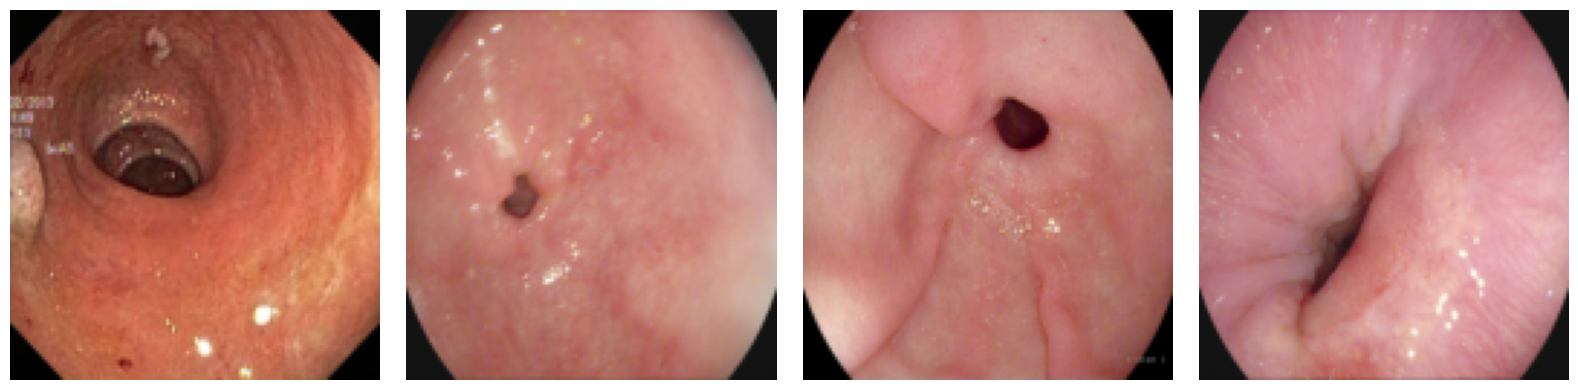

tensor([10, 11, 11, 19], device='mps:0')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.07108921..1.0000002].


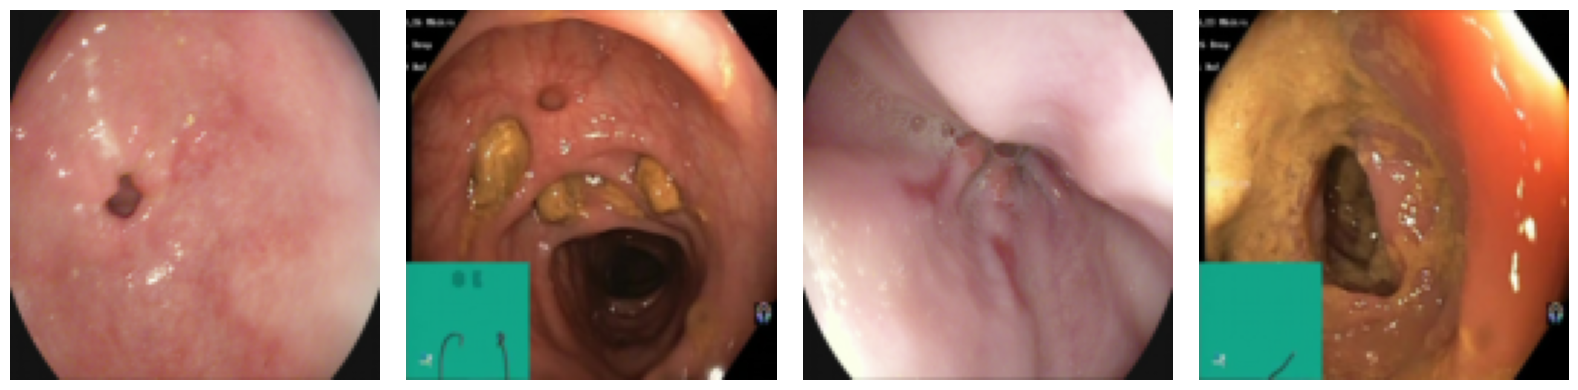

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]], device='mps:0')


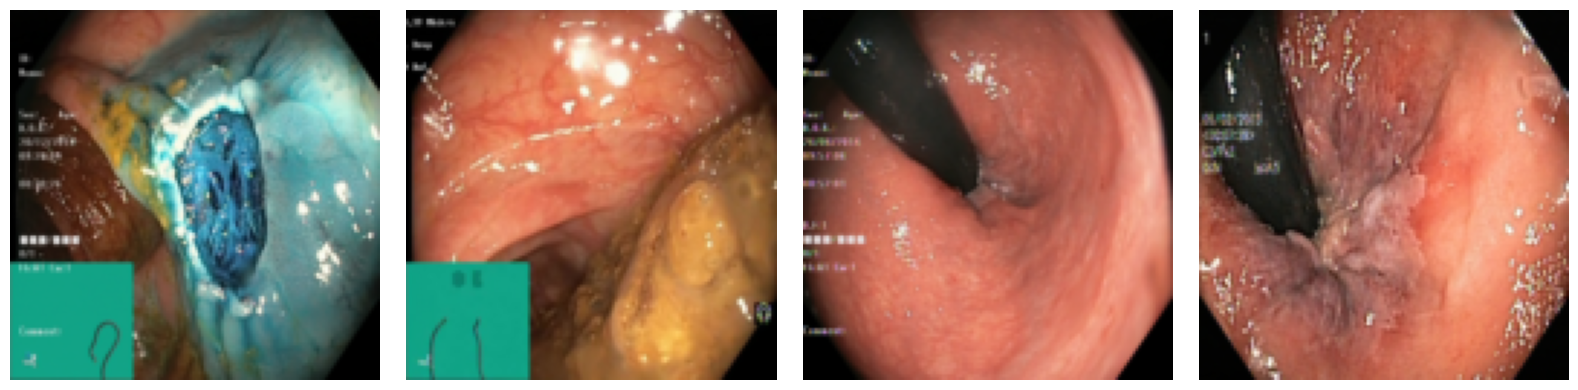

tensor([ 6,  2, 12, 12], device='mps:0')


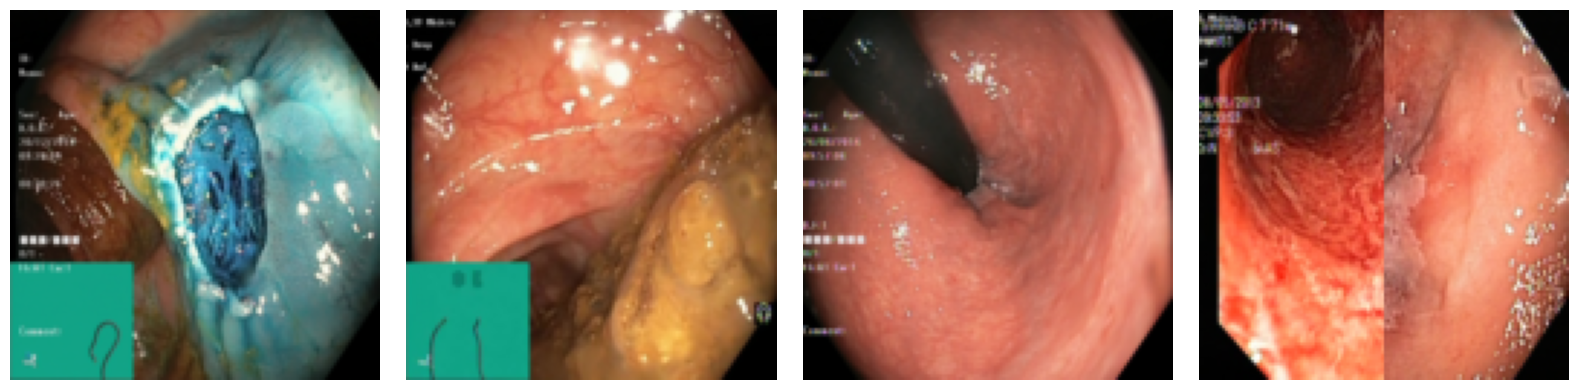

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.5000, 0.0000]], device='mps:0')


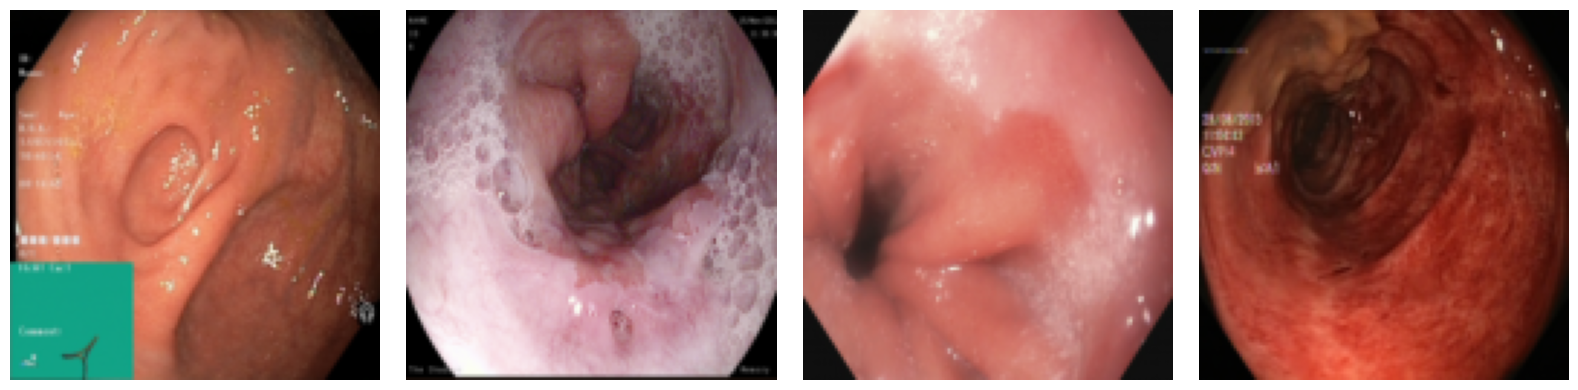

tensor([ 4, 19, 19,  2], device='mps:0')


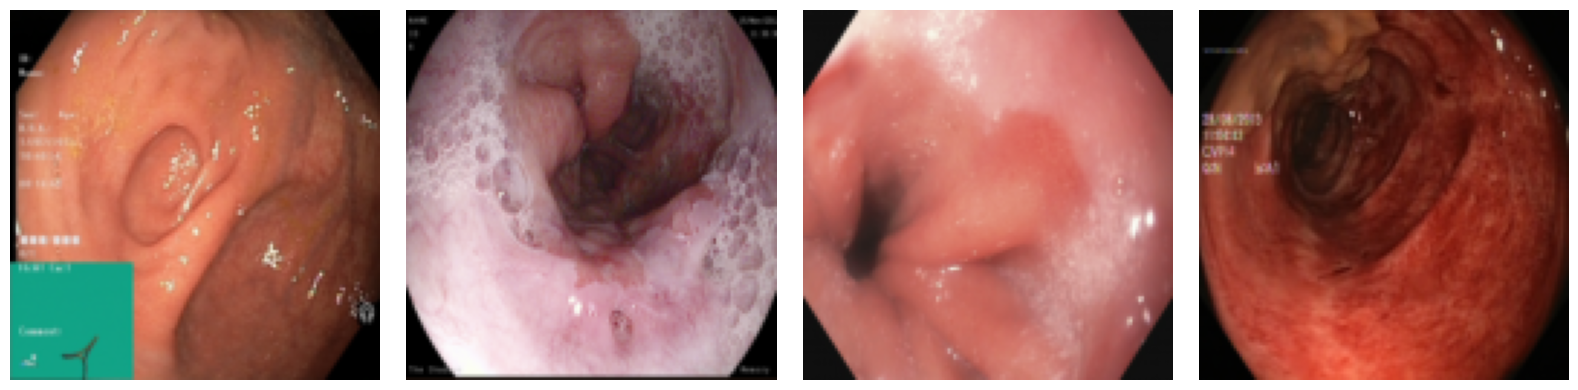

tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]], device='mps:0')


In [ ]:
import lightning as L

trainer = L.Trainer(
    precision='16-mixed',
    max_epochs=1,
    # set it for quick debugging
    max_steps=1, fast_dev_run=True,
)

trainer.fit(model, dm)